In [5]:
from keras import layers
from keras import models
import matplotlib.pyplot as plt
model = None

In [4]:
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

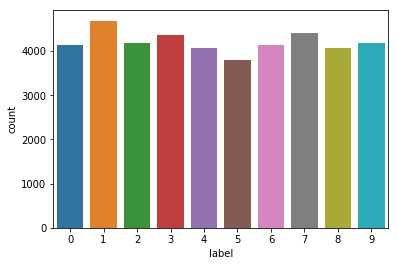

In [8]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [9]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [11]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
# Set the random seed
random_seed = 2

In [14]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

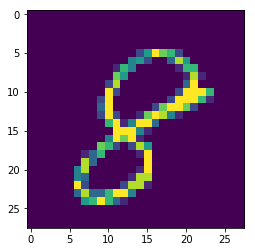

In [15]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
import tensorflow as tf 
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [17]:
#model = Sequential()
#
#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                 activation ='relu', input_shape = (28,28,1)))
#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
#
#
#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                 activation ='relu'))
#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))
#
#
#model.add(Flatten())
#model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation = "softmax"))

In [109]:
model = None

In [125]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [126]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [127]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', \
              metrics=['accuracy'])

In [128]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [132]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [130]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [133]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 8s - loss: 0.0636 - acc: 0.9803 - val_loss: 0.0319 - val_acc: 0.9900
Epoch 2/30
 - 8s - loss: 0.0571 - acc: 0.9827 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 3/30
 - 8s - loss: 0.0541 - acc: 0.9837 - val_loss: 0.0304 - val_acc: 0.9907
Epoch 4/30
 - 8s - loss: 0.0491 - acc: 0.9847 - val_loss: 0.0280 - val_acc: 0.9912
Epoch 5/30
 - 8s - loss: 0.0450 - acc: 0.9865 - val_loss: 0.0392 - val_acc: 0.9869
Epoch 6/30
 - 9s - loss: 0.0438 - acc: 0.9873 - val_loss: 0.0213 - val_acc: 0.9936
Epoch 7/30
 - 8s - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0271 - val_acc: 0.9933
Epoch 8/30
 - 8s - loss: 0.0402 - acc: 0.9882 - val_loss: 0.0243 - val_acc: 0.9914
Epoch 9/30
 - 8s - loss: 0.0379 - acc: 0.9884 - val_loss: 0.0221 - val_acc: 0.9919

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 10/30
 - 8s - loss: 0.0286 - acc: 0.9920 - val_loss: 0.0153 - val_acc: 0.9945
Epoch 11/30
 - 8s - loss: 0.0247 - acc: 0.9927 - val_loss: 0.0276 - val_acc: 0.9929
Epoc

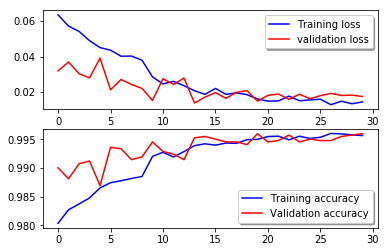

In [134]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### submit

In [135]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [136]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)